In [2]:
from Envs.pendulum import PendulumEnv
import gymnasium as gym
from gymnasium.wrappers import TimeLimit

In [3]:
env = PendulumEnv()
env = TimeLimit(env, max_episode_steps=200) 

In [3]:
from sb3_contrib import TRPO

In [4]:
TRPO_model = TRPO("MlpPolicy", env=env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
TRPO_model.learn(200000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -208     |
| time/              |          |
|    fps             | 521      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -272     |
| time/                     |          |
|    fps                    | 496      |
|    iterations             | 2        |
|    time_elapsed           | 8        |
|    total_timesteps        | 4096     |
| train/                    |          |
|    explained_variance     | 0.912    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00737  |
|    learning_rate          | 0.001    |
|    n_updates              | 50       |
|    policy_objective       | 0.0233   |
|   

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -273     |
| time/                     |          |
|    fps                    | 419      |
|    iterations             | 13       |
|    time_elapsed           | 63       |
|    total_timesteps        | 26624    |
| train/                    |          |
|    explained_variance     | 0.939    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00935  |
|    learning_rate          | 0.001    |
|    n_updates              | 61       |
|    policy_objective       | 0.0346   |
|    std                    | 0.673    |
|    value_loss             | 37.1     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -279     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -252     |
| time/                     |          |
|    fps                    | 387      |
|    iterations             | 24       |
|    time_elapsed           | 126      |
|    total_timesteps        | 49152    |
| train/                    |          |
|    explained_variance     | 0.958    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00587  |
|    learning_rate          | 0.001    |
|    n_updates              | 72       |
|    policy_objective       | 0.0173   |
|    std                    | 0.645    |
|    value_loss             | 36.9     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -245     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -175     |
| time/                     |          |
|    fps                    | 373      |
|    iterations             | 35       |
|    time_elapsed           | 192      |
|    total_timesteps        | 71680    |
| train/                    |          |
|    explained_variance     | 0.98     |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00763  |
|    learning_rate          | 0.001    |
|    n_updates              | 83       |
|    policy_objective       | 0.0305   |
|    std                    | 0.627    |
|    value_loss             | 26.5     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -174     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -193     |
| time/                     |          |
|    fps                    | 367      |
|    iterations             | 46       |
|    time_elapsed           | 256      |
|    total_timesteps        | 94208    |
| train/                    |          |
|    explained_variance     | 0.989    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00776  |
|    learning_rate          | 0.001    |
|    n_updates              | 94       |
|    policy_objective       | 0.0241   |
|    std                    | 0.556    |
|    value_loss             | 3.04     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -196     |
| time/                     |          |
|    fps        

In [11]:
TRPO_model.save("models/TRPO_200k")

In [1]:
from Envs.pendulum import PendulumEnv
import gymnasium as gym
from gymnasium.wrappers import TimeLimit

env = PendulumEnv()
env = TimeLimit(env, max_episode_steps=200) 

In [2]:
from sb3_contrib import TRPO
TRPO_model = TRPO.load("models/TRPO_200k.zip", env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [3]:
from sb3_contrib import TRPO
from Client_diff import FRLClient
from Agent import SB3Agent
import copy
from stable_baselines3.common.evaluation import evaluate_policy
import torch

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
train_log = {}
test_log = {}

In [6]:
timesteps_real_per_round = 500
timesteps_fc_per_round = timesteps_real_per_round * 30
epoch_per_round = 100
CLIENTS_NUM = 10
rounds_num = 20
batch_size_env_model = 128

env_models = []

Global_RL = TRPO_model

env_theta = [0.1, 0.3, 0.5, 0.7, 0.9]
real_envs = []
Clients = []
for i in range(CLIENTS_NUM):
    real_envs.append( TimeLimit(PendulumEnv(), max_episode_steps=200) )
    policy_net = Global_RL
    agent = SB3Agent(policy_net)
    client = FRLClient(real_envs[i], agent, lr = 3e-4, hidden_size = 256, device = device)
    Clients.append(client)
    env_model = copy.deepcopy(client.model)
    env_models.append(env_model)

    
train_loss_list = []
test_avg_list = []

for client_idx in range(len(Clients)):
    print('------------------------------')
    print("client: " + str(client_idx))
    # update policy
    # train prediction models
    Clients[client_idx].learn(timesteps_real_per_round, epoch_per_round, batch_size_env_model)
     #
    train_loss_list.append(Clients[client_idx].train_loss_list)
    test_avg_list.append(Clients[client_idx].test_avg_list)
    

------------------------------
client: 0
Avg loss: 0.01673516391737697!
Avg loss: 0.013303309539915063!
Avg loss: 0.010238442414944681!
Avg loss: 0.008955776846313105!
Avg loss: 0.006922076082491913!
Avg loss: 0.005691641043983206!
Avg loss: 0.0050886774520040486!
Avg loss: 0.004468077920810174!
Avg loss: 0.004087001868441196!
Avg loss: 0.0038044902124238435!
Avg loss: 0.0037448041913254806!
Avg loss: 0.0035139931911908205!
Avg loss: 0.0033896179141387015!
Avg loss: 0.003342050553340717!
Avg loss: 0.003362903926002521!
Avg loss: 0.0033562783217106094!
Avg loss: 0.003285711638682187!
Avg loss: 0.00327101103829591!
Avg loss: 0.003265990052974909!
Avg loss: 0.003232751886098413!
Avg loss: 0.0031925582723723285!
Avg loss: 0.003183258677381673!
Avg loss: 0.003186803499046012!
Avg loss: 0.0031692389432760137!
Avg loss: 0.003154372695460476!
Avg loss: 0.003148295269632702!
Avg loss: 0.0031475110264758163!
Avg loss: 0.003144144274203124!
Avg loss: 0.0031414263950568966!
Avg loss: 0.00314385844

Avg loss: 0.008861166991235904!
Avg loss: 0.008813597210067125!
Avg loss: 0.008801188128721075!
Avg loss: 0.008792974383162573!
Avg loss: 0.008768892615748883!
Avg loss: 0.00874733072863061!
Avg loss: 0.00873425989318624!
Avg loss: 0.008738040397078824!
Avg loss: 0.008735900420820902!
Avg loss: 0.008726238454874248!
Avg loss: 0.008717349702523716!
Avg loss: 0.008711299904030814!
Avg loss: 0.00870864453885948!
Avg loss: 0.008705583578699437!
Avg loss: 0.008699505284923437!
Avg loss: 0.008690171744856628!
Avg loss: 0.008689217924319337!
Avg loss: 0.008690380937493861!
Avg loss: 0.008696172874505331!
Avg loss: 0.008697764017198325!
Avg loss: 0.008694691766858303!
Avg loss: 0.008696616743380521!
Avg loss: 0.008695981033000351!
Avg loss: 0.00869798313079779!
Avg loss: 0.008692829646196571!
Avg loss: 0.008686107361010897!
Avg loss: 0.008682345462636363!
Avg loss: 0.008687396936054389!
Avg loss: 0.00869564916122177!
Avg loss: 0.00868947216567875!
Avg loss: 0.008685081757667868!
Avg loss: 0.00

Avg loss: 0.00957590450410341!
Avg loss: 0.009569467235507622!
Avg loss: 0.009573995086801072!
Avg loss: 0.009569377318233686!
Avg loss: 0.009571976753000703!
Avg loss: 0.009566682854372838!
Avg loss: 0.009572200587023688!
Avg loss: 0.00956383628396054!
------------------------------
client: 7
Avg loss: 0.03782493957265009!
Avg loss: 0.03486156677594408!
Avg loss: 0.027919171041066875!
Avg loss: 0.023746302005796072!
Avg loss: 0.019988535788143053!
Avg loss: 0.017202203204427256!
Avg loss: 0.015612757696762855!
Avg loss: 0.01381153462951867!
Avg loss: 0.012449314559639789!
Avg loss: 0.011514614414657747!
Avg loss: 0.010701553376681355!
Avg loss: 0.010415487411322222!
Avg loss: 0.010179796131612117!
Avg loss: 0.009991503198457395!
Avg loss: 0.009951003762713906!
Avg loss: 0.00983803034423469!
Avg loss: 0.009704456030464522!
Avg loss: 0.009590080165652732!
Avg loss: 0.009563033705690031!
Avg loss: 0.009557200182280212!
Avg loss: 0.009510083679476793!
Avg loss: 0.009473771467044496!
Avg l

In [10]:
train_log["Droput"] = train_loss_list

In [11]:
train_log["Droput"]

[[0.0796382598002524,
  0.0572470675908392,
  0.059868148541382185,
  0.058853451365386174,
  0.048217550048172304,
  0.04944240192970779,
  0.04521475685360097,
  0.04184090988683837,
  0.0388406586851978,
  0.039875135039190164,
  0.03534503652578097,
  0.03354495029394811,
  0.03537317538329728,
  0.03192451416933775,
  0.03234397989289467,
  0.023782265562041098,
  0.027432150690466763,
  0.027965860585428583,
  0.02923224033803858,
  0.0311071305698515,
  0.025594771420716558,
  0.020898430941781204,
  0.02505527116507719,
  0.02739421105316512,
  0.02353651749028859,
  0.022059008521815086,
  0.019931193067556124,
  0.021458601883284342,
  0.02058717753620749,
  0.02188623771284918,
  0.02366658268138809,
  0.01574068834583534,
  0.020644972864058093,
  0.018700345881005755,
  0.018071157542887253,
  0.01719268311060602,
  0.01856653225797637,
  0.020718375044770775,
  0.017823540720352127,
  0.018034067741437763,
  0.017675121397548555,
  0.018020003777861938,
  0.01553623655805

In [8]:
test_avg_list[0]

[0.01673516391737697,
 0.013303309539915063,
 0.010238442414944681,
 0.008955776846313105,
 0.006922076082491913,
 0.005691641043983206,
 0.0050886774520040486,
 0.004468077920810174,
 0.004087001868441196,
 0.0038044902124238435,
 0.0037448041913254806,
 0.0035139931911908205,
 0.0033896179141387015,
 0.003342050553340717,
 0.003362903926002521,
 0.0033562783217106094,
 0.003285711638682187,
 0.00327101103829591,
 0.003265990052974909,
 0.003232751886098413,
 0.0031925582723723285,
 0.003183258677381673,
 0.003186803499046012,
 0.0031692389432760137,
 0.003154372695460476,
 0.003148295269632702,
 0.0031475110264758163,
 0.003144144274203124,
 0.0031414263950568966,
 0.0031438584438910765,
 0.00314451575590662,
 0.003140912079309146,
 0.0031404410053903573,
 0.003139347601755844,
 0.0031364195732150315,
 0.003136586924792558,
 0.003137705584537874,
 0.00313615584510103,
 0.0031356757727394324,
 0.003135855197725353,
 0.003138165442911903,
 0.0031392799315312914,
 0.003139991662077743,


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves_and_statistics(loss_list):
    """
    绘制loss曲线和统计信息图像。

    参数:
    loss_list (list of list of float): 每个元素是一个模型在每个epoch的loss列表。
    """
    # 绘制每个模型的loss曲线
    plt.figure(figsize=(10, 6))
    for idx, loss in enumerate(loss_list):
        plt.plot(loss, label=f'Model {idx+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 计算每个模型最后一个epoch的loss值
    last_epoch_losses = [loss[-1] for loss in loss_list]

    # 计算最后一个epoch的平均值和方差
    mean_last_epoch_loss = np.mean(last_epoch_losses)
    std_last_epoch_loss = np.std(last_epoch_losses)

    # 绘制最后一个epoch的loss值，平均值和方差
    plt.figure(figsize=(10, 6))
    plt.plot(last_epoch_losses, 'o-', label='Last Epoch Loss')
    plt.axhline(mean_last_epoch_loss, color='r', linestyle='--', label=f'Mean: {mean_last_epoch_loss:.2f}')
    plt.fill_between(range(len(last_epoch_losses)), mean_last_epoch_loss - std_last_epoch_loss, mean_last_epoch_loss + std_last_epoch_loss, color='r', alpha=0.2, label=f'Std Dev: {std_last_epoch_loss:.2f}')
    plt.xlabel('Model Index')
    plt.ylabel('Loss')
    plt.title('Last Epoch Losses with Mean and Std Dev')
    plt.legend()
    plt.grid(True)
    plt.show()


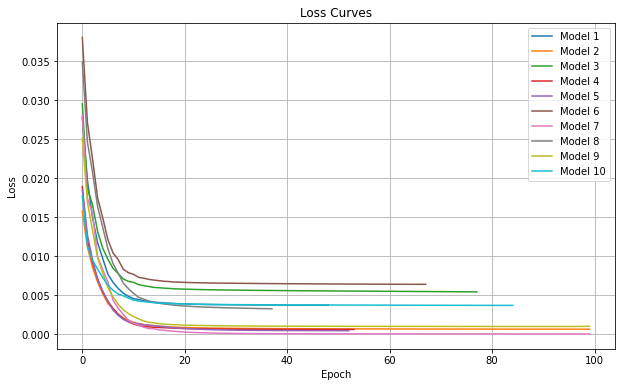

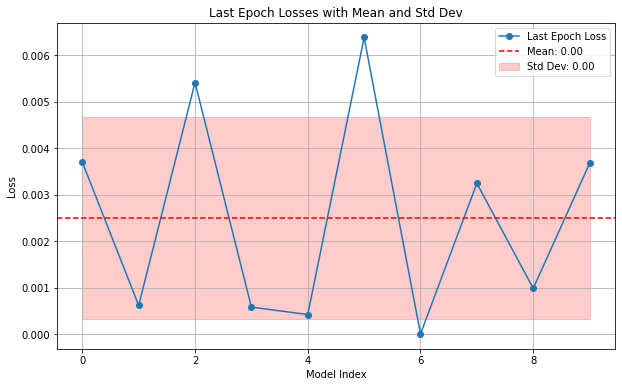

In [10]:
plot_loss_curves_and_statistics(train_loss_list)